<a href="https://colab.research.google.com/github/Rabo27/Olympic-Analysis-with-python-/blob/main/Country_Medals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ramontanoeiro_summer_olympic_medals_1986_2020_path = kagglehub.dataset_download('ramontanoeiro/summer-olympic-medals-1986-2020')

print('Data source import complete.')

Using Colab cache for faster access to the 'summer-olympic-medals-1986-2020' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympic-medals-1986-2020/Summer_olympic_Medals.csv


In [ ]:
import os
df = pd.read_csv(os.path.join(ramontanoeiro_summer_olympic_medals_1986_2020_path, 'Summer_olympic_Medals.csv'))

In [ ]:
df.isnull().sum()

,0
Year,0
Host_country,0
Host_city,0
Country_Name,0
Country_Code,86
Gold,0
Silver,0
Bronze,0


In [ ]:
#to replace the null variable
df['Country_Code'].fillna(method='ffill',inplace=True)
df['Host_city'].fillna(method='ffill',inplace=True)
df['Host_country'].fillna(method='ffill',inplace=True)

/tmp/ipython-input-2111806545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country_Code'].fillna(method='ffill',inplace=True)
/tmp/ipython-input-2111806545.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Country_Code'].fillna(method='ffill',inplace=True)
/tmp/ipython-input-2111806545.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The

In [ ]:
df.describe()

,Year,Gold,Silver,Bronze
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,1978.958333,4.069196,4.037946,4.389137
std,33.482213,8.448017,7.095197,6.843179
min,1896.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.000000,0.000000,1.000000
50%,1988.000000,1.000000,2.000000,2.000000
75%,2008.000000,4.000000,4.000000,5.000000
max,2020.000000,83.000000,78.000000,77.000000


In [ ]:
df.shape

(1344, 8)

In [ ]:
print(df['Year'].unique())
print(df['Host_city'].unique())
print(df['Host_country'].unique())

[1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016
 2020]
['Athens' 'Paris' 'St. Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne/Stockholm' 'Rome' 'Tokyo'
 'Mexico City' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing' 'Rio de Janeiro']
['Greece' 'France' 'United States' 'Great Britain' 'Sweden' 'Belgium'
 'Netherlands' 'Germany' 'Finland' 'Australia/Sweden' 'Italy' 'Japan'
 'Mexico' 'West Germany' 'Canada' 'Soviet Union' 'South Korea' 'Spain'
 'Australia' 'China' 'Brazil']


In [ ]:
df.columns

Index(['Year', 'Host_country', 'Host_city', 'Country_Name', 'Country_Code',
       'Gold', 'Silver', 'Bronze'],
      dtype='object')

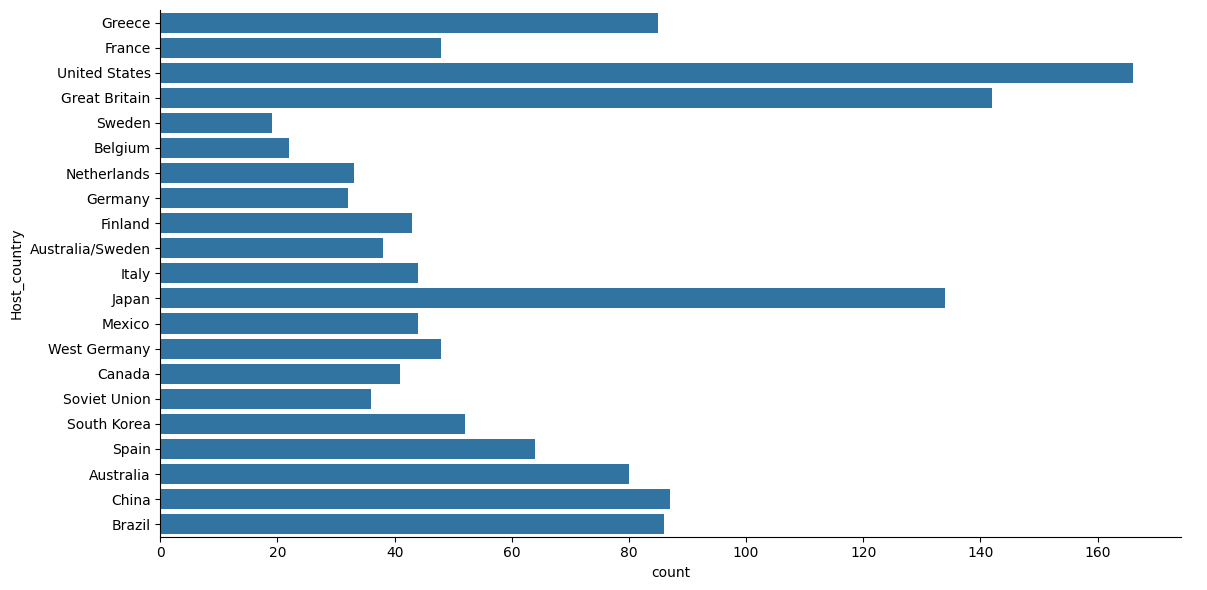

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# The original figsize was very large and sns.catplot (replacement for factorplot)
# uses 'height' and 'aspect' for sizing, so plt.figure is not needed here.
sns.catplot(y='Host_country',kind='count',data=df, height=6, aspect=2)
plt.show()

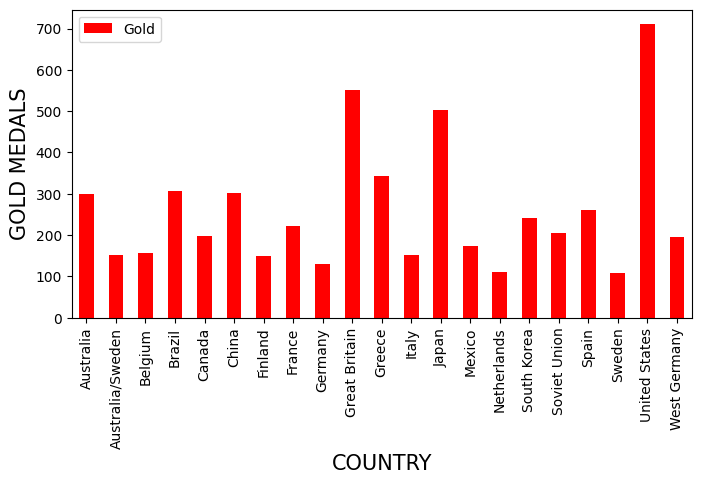

In [ ]:
df.groupby('Host_country')[['Host_city','Gold']].sum().plot.bar(color=['red','blue'],figsize=(8,4))
plt.xlabel('COUNTRY',fontsize=15)
plt.ylabel('GOLD MEDALS',fontsize=15)
plt.show()

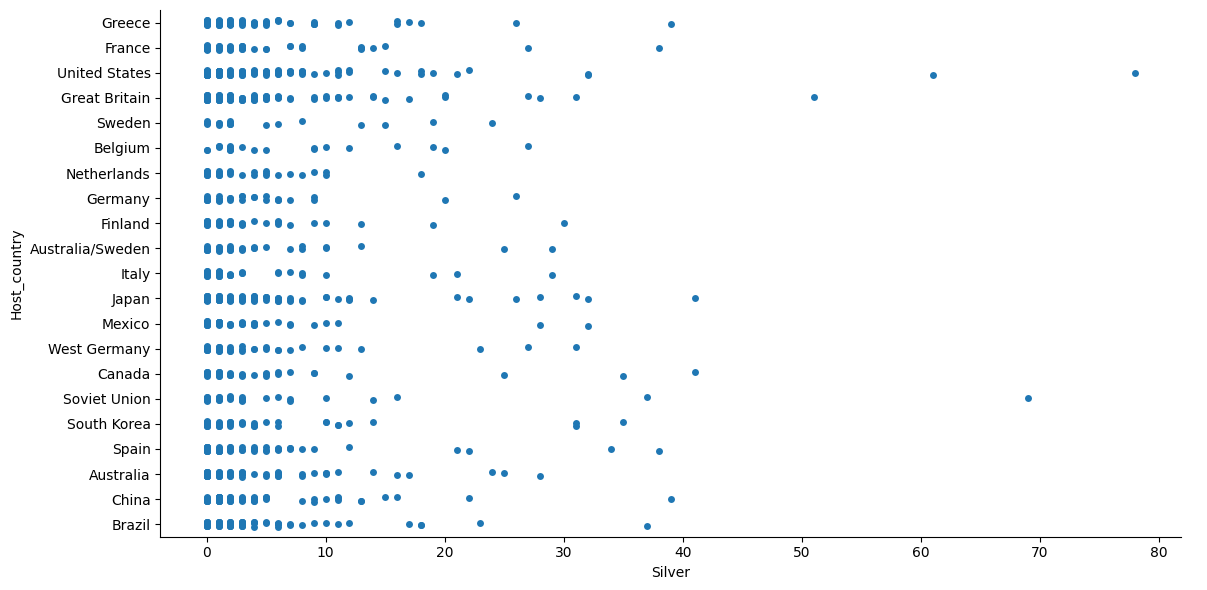

In [ ]:
sns.catplot(y='Host_country', x='Silver', data=df, height=6, aspect=2)
plt.show()

In [ ]:
total=df["Gold"]+df["Silver"]+df["Bronze"]
df['total']=total
print(df)

      Year Host_country Host_city   Country_Name Country_Code  Gold  Silver  \
0     1896       Greece    Athens  Great Britain          GBR     2       3   
1     1896       Greece    Athens        Hungary          HUN     2       1   
2     1896       Greece    Athens         France          FRA     5       4   
3     1896       Greece    Athens  United States          USA    11       7   
4     1896       Greece    Athens        Germany          GER     6       5   
...    ...          ...       ...            ...          ...   ...     ...   
1339  2020        Japan     Tokyo           Fiji          FIJ     1       0   
1340  2020        Japan     Tokyo        Estonia          EST     1       0   
1341  2020        Japan     Tokyo         Latvia          LAT     1       0   
1342  2020        Japan     Tokyo        Bermuda          BER     1       0   
1343  2020        Japan     Tokyo       Thailand          THA     1       0   

      Bronze  total  
0          2      7  
1      

In [ ]:
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,total
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


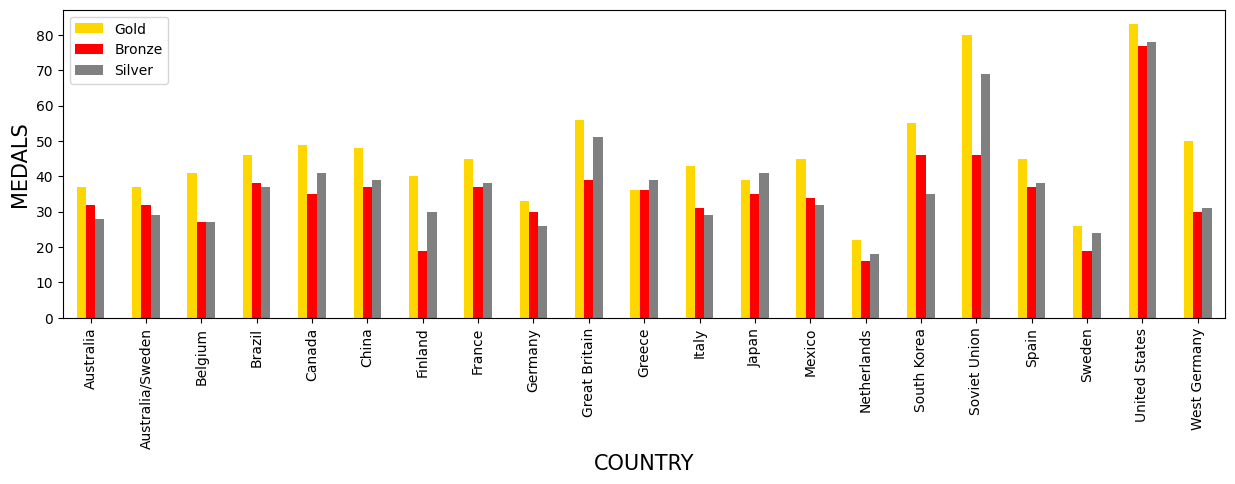

In [ ]:
df.groupby('Host_country')[['Gold','Bronze','Silver']].max().plot.bar(color=['gold','red','grey'],figsize=(15,4))
plt.xlabel('COUNTRY',fontsize=15)
plt.ylabel('MEDALS',fontsize=15)
plt.show()

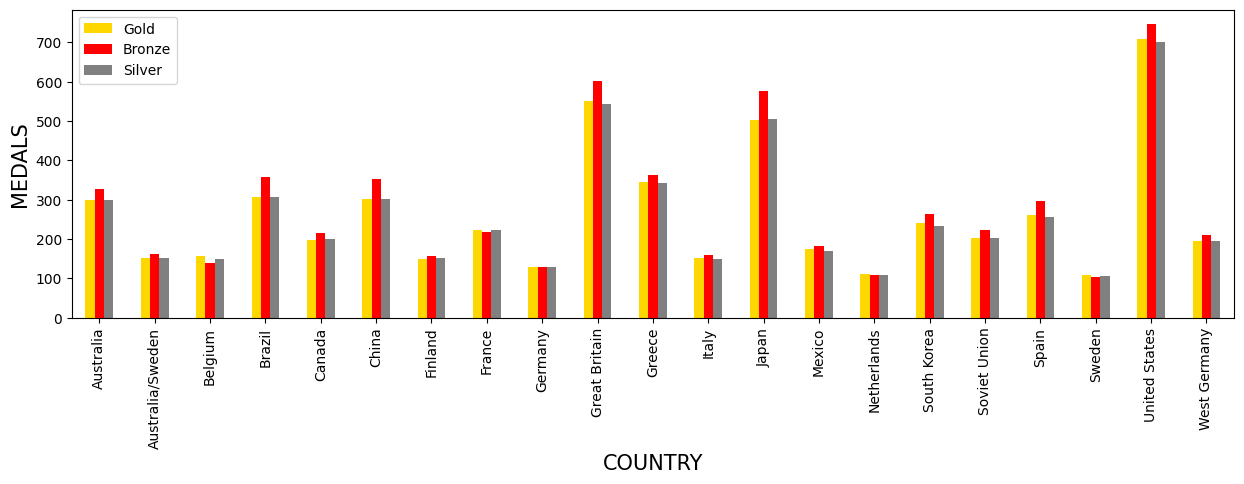

In [ ]:
df.groupby('Host_country')[['Gold','Bronze','Silver']].sum().plot.bar(color=['gold','red','grey'],figsize=(15,4),)
plt.xlabel('COUNTRY',fontsize=15)
plt.ylabel('MEDALS',fontsize=15)
plt.show()

In [ ]:
print(df['Country_Name'].unique())

['Great Britain' 'Hungary' 'France' 'United States' 'Germany' 'Austria'
 'Mixed team' 'Greece' 'Switzerland' 'Australia' 'Denmark' 'Italy' 'Cuba'
 'India' 'Netherlands' 'Bohemia' 'Belgium' 'Sweden' 'Spain' 'Canada'
 'Luxembourg' 'Norway' 'Australasia' 'Russian Empire' 'South Africa'
 'Finland' 'Brazil' 'Czechoslovakia' 'New Zealand' 'Japan' 'Estonia'
 'Haiti' 'Romania' 'Poland' 'Portugal' 'Argentina' 'Yugoslavia' 'Uruguay'
 'Philippines' 'Chile' 'Egypt' 'Ireland' 'Latvia' 'Mexico' 'Turkey'
 'Jamaica' 'Peru' 'South Korea' 'Trinidad and Tobago' 'Panama'
 'Puerto Rico' 'Iran' 'Ceylon' 'Soviet Union' 'Venezuela' 'Bulgaria'
 'Lebanon' 'Bahamas' 'Pakistan' 'Iceland' 'United Team of Germany'
 'Ethiopia' 'Singapore' 'Republic of China' 'Morocco'
 'British West Indies' 'Iraq' 'Ghana' 'Kenya' 'Nigeria' 'Tunisia'
 'East Germany' 'West Germany' 'Uganda' 'Cameroon' 'Mongolia'
 'North Korea' 'Niger' 'Colombia' 'Thailand' 'Bermuda' 'Tanzania'
 'Zimbabwe' 'Guyana' 'Zambia' 'Dominican Republic' 'China'

### United States medals at the Summer Olympics

In [ ]:
df[df['Country_Name']=='United States'].drop(['Country_Code','Country_Name','Host_city'],
                                             axis=1).sort_values(['Year'], ascending=True)

,Year,Host_country,Gold,Silver,Bronze,total
3,1896,Greece,11,7,2,20
18,1900,France,19,14,15,48
35,1904,United States,76,78,77,231
50,1908,Great Britain,23,12,12,47
69,1912,Sweden,26,19,19,64
100,1920,Belgium,41,27,27,95
114,1924,France,45,27,27,99
143,1928,Netherlands,22,18,16,56
182,1932,United States,41,32,30,103
200,1936,Germany,24,20,12,56


### India medals at the Summer Olympics

In [ ]:
df[df['Country_Name']=='India'].drop(['Country_Code','Country_Name','Host_city'],
                                                                         axis=1).sort_values(['Year'], ascending=True)

,Year,Host_country,Gold,Silver,Bronze,total
22,1900,France,0,2,0,2
161,1928,Netherlands,1,0,0,1
191,1932,United States,1,0,0,1
222,1936,Germany,1,0,0,1
230,1948,Great Britain,1,0,0,1
297,1952,Finland,1,0,1,2
316,1956,Australia/Sweden,1,0,0,1
375,1960,Italy,0,1,0,1
391,1964,Japan,1,0,0,1
455,1968,Mexico,0,0,1,1


### Australia medals at the Summer Olympics

In [ ]:
df[df['Country_Name']=='Australia'].drop(['Country_Code','Country_Name','Host_city'],
                                        axis=1).sort_values(['Year'], ascending=True)

,Year,Host_country,Gold,Silver,Bronze,total
9,1896,Greece,2,0,0,2
13,1900,France,2,0,3,5
39,1904,United States,0,3,1,4
85,1920,Belgium,0,2,1,3
110,1924,France,3,1,2,6
157,1928,Netherlands,1,2,1,4
166,1932,United States,3,1,1,5
212,1936,Germany,0,0,1,1
226,1948,Great Britain,2,6,5,13
280,1952,Finland,6,2,3,11


### play worst country name - United States

In [ ]:
df[df['Country_Name']=='United States'].drop(['Country_Code','Country_Name','Host_city'],
                                             axis=1).sort_values(['total'], ascending=True).head()

,Year,Host_country,Gold,Silver,Bronze,total
3,1896,Greece,11,7,2,20
50,1908,Great Britain,23,12,12,47
18,1900,France,19,14,15,48
143,1928,Netherlands,22,18,16,56
200,1936,Germany,24,20,12,56


### play worst country name - India

In [ ]:
df[df['Country_Name']=='India'].drop(['Country_Code','Country_Name','Host_city'],
                                     axis=1).sort_values(['total'], ascending=True).head(1)

,Year,Host_country,Gold,Silver,Bronze,total
161,1928,Netherlands,1,0,0,1


## Maximum Medals won country

In [ ]:
df.drop(['Country_Code','Host_city'],axis=1).sort_values(['total'], ascending=False).head()

,Year,Host_country,Country_Name,Gold,Silver,Bronze,total
35,1904,United States,United States,76,78,77,231
567,1980,Soviet Union,Soviet Union,80,69,46,195
598,1984,United States,United States,83,61,30,174
51,1908,Great Britain,Great Britain,56,51,39,146
658,1988,South Korea,Soviet Union,55,31,46,132
